# Project: Investigate a Dataset (TMDb Movies Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains information about movies, release year of the movie, budget, revenue, production companies,  runtime of the movies, gener, cast, director etc.

>### Questions:
>1. **number of movies release by year. **
>
>2. **Relation between Budget and Revenue. **
>
>3. **number of movies by genres and Which Gener get more revenue**
>
>4. **Which gener is most popular year by year? **

In [181]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np # statical function and verctor operations
import pandas as pd # importing dataset and statical functions
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # interactive visualization
#import datetime as datetime # working with dates

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [182]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

movies_df = pd.read_csv('tmdb-movies.csv')

In [183]:
# shape of the dataframe
movies_df.shape

(10866, 21)

movies_df dataframe has 10866 observations and 21 variables.

In [184]:
# datatypes of each variable and basic information
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

here 10 imdb_id are missing, there is no missing value in budget, revenue and many other variables

**number of unique year in dataset**

In [185]:
# find the number of unique year and id's
movies_df['release_year'].nunique()

56

** number of unique id in dataset**

In [186]:
movies_df['id'].nunique()

10865

***Notice:*** in dataset the number of rows are 10866 and number of unique id are 10865, so there is 1 id that has 2 movies or 2 same entries.


### Data Cleaning (Replace this with more specific notes!)

**check duplicate entries in dataset**

In [187]:
movies_df.duplicated().any() # check any duplicate value in dataset 

True

** find duplicate row and remove it **

In [188]:
movies_df[movies_df.duplicated()]['id']

2090    42194
Name: id, dtype: int64

id 42129 has duplicate rows, see the rows in next cell

In [189]:
#let's see duplicate rows
movies_df[movies_df.id == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**remove duplicate row**

In [190]:
movies_df = movies_df.drop_duplicates()
movies_df.shape

(10865, 21)

Now duplicates rows removed, now we have 10865 entries and 10865 unique id means 
each movie has particular associate unique id

**change the datatype of release_date object to datetime datatype**

In [191]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

**create new column release_month for monthly distribution for further investigation**

In [192]:
#create new column
movies_df['release_month'] = movies_df['release_date'].dt.strftime('%B')
movies_df.shape

(10865, 22)

In [193]:
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'release_month'],
      dtype='object')

** Trim the dataset with a variables in which i am interested to explore the data **

In [194]:
# create new dataframe from existing dataframe with interestd variables
new_movies_df = movies_df.iloc[:, [0, 2, 3, 4, 5, 12, 13, 16, 17, 18, 21]]
new_movies_df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,release_month
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,June
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,May
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,March
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,December
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,April


In [195]:
#check the statistics of the new datsframe
new_movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> there is very large difference  in between mean and median of revenue and budget respcetively budget and revenue has median is 0 and mean is very high, means most of the values of budget and revenue filled with 0, actually these are bad data points in dataframe.

### Dealing with bad data points

In [196]:
# number of rows, which has budget=0
len(new_movies_df[new_movies_df.budget == 0])

5696

In [197]:
#number of rows, which has revenue=0
len(new_movies_df[new_movies_df.revenue == 0])

6016

> Now we need to decide best estimate value to replace these 0 value, i will replace these 0 value with mean value of the revenue and budget by year, in which year having 0 value

>First i will find the release_year for that particular 0 value and take the mean of revenue or budget variable for this year and replace 0 with this mean.

In [198]:
# find the unique year in dataframe
unique_years = new_movies_df['release_year'].unique()
unique_years

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [199]:
# calculate the mean of budget and revenue by year and store it in dictionary
yearly_avg_value = {}
for year in unique_years:
    avg_value = []
    avg_budget = new_movies_df.loc[new_movies_df.release_year == year, 'budget'].mean()
    avg_revenue = new_movies_df.loc[new_movies_df.release_year == year, 'revenue'].mean()
    avg_value.append(avg_budget)
    avg_value.append(avg_revenue)
    yearly_avg_value[year] = avg_value

In [200]:
yearly_avg_value[1960][0]

689279.625

In [201]:
# replace the 0 value from budget and revenue column
for year in yearly_avg_value.keys():
    new_movies_df.loc[new_movies_df.release_year== year, 'budget'] = \
               new_movies_df.loc[new_movies_df.release_year == year,'budget'].replace(0, yearly_avg_value[year][0])
    new_movies_df.loc[new_movies_df.release_year== year, 'revenue'] = \
               new_movies_df.loc[new_movies_df.release_year == year,'revenue'].replace(0, yearly_avg_value[year][1])

C:\Users\dream\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\dream\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [202]:
new_movies_df[new_movies_df.revenue==0]['revenue'].count()

0

In [203]:
new_movies_df[new_movies_df.budget == 0]['budget'].count()

0

> now all the bad data point from budget and revenue has filled with mean value of that particular year, now we can start further investigation. 

In [204]:
#chack the statistics again
new_movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,2.188967e+07,6.143101e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,2.847848e+07,1.114198e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,8.000000e+06,2.292190e+07,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.500000e+07,4.027214e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,2.220590e+07,5.000000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : number of movies release by year.

**I use count plot which will show the number of movies release by year**

C:\Users\dream\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


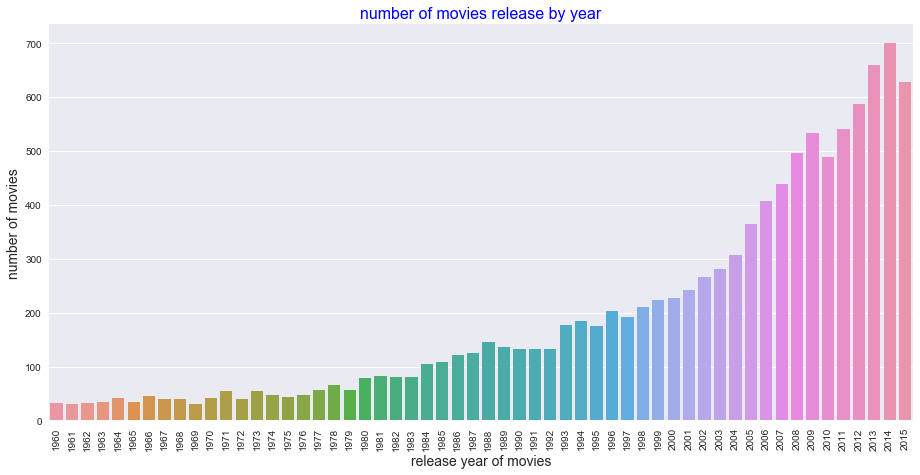

In [205]:
# make the count plot 
plt.axes([0, 1.5, 1.5, 1])
sns.countplot(x = 'release_year', data = new_movies_df)
plt.xlabel('release year of movies', fontsize = 14)
plt.ylabel('number of movies', fontsize = 14)
plt.title('number of movies release by year', fontsize = 16, color = 'blue')
plt.xticks(rotation = 90)
plt.show()

*we can see from the graph that number of movies released increase year by year, In 2014, highest 700 movies released.*

### Question 2 : Relation between Budget and Revenue.

**First find the correlation cofficient between variables**

In [206]:
new_movies_df.corr(method = 'pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,-0.014351,-0.114680,-0.066873,-0.088368,-0.035555,-0.058391,0.511393
popularity,-0.014351,1.000000,0.512934,0.635375,0.139032,0.800828,0.209517,0.089806
budget,-0.114680,0.512934,1.000000,0.706340,0.164291,0.610419,0.066475,0.200586
revenue,-0.066873,0.635375,0.706340,1.000000,0.138793,0.771758,0.146803,0.104885
runtime,-0.088368,0.139032,0.164291,0.138793,1.000000,0.163273,0.156813,-0.117187
vote_count,-0.035555,0.800828,0.610419,0.771758,0.163273,1.000000,0.253818,0.107962
vote_average,-0.058391,0.209517,0.066475,0.146803,0.156813,0.253818,1.000000,-0.117576
release_year,0.511393,0.089806,0.200586,0.104885,-0.117187,0.107962,-0.117576,1.000000


> budget and revenue has high pearson correlation coefficient 0.706, and popularity, vote_count also has high correlation coeff. 

C:\Users\dream\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


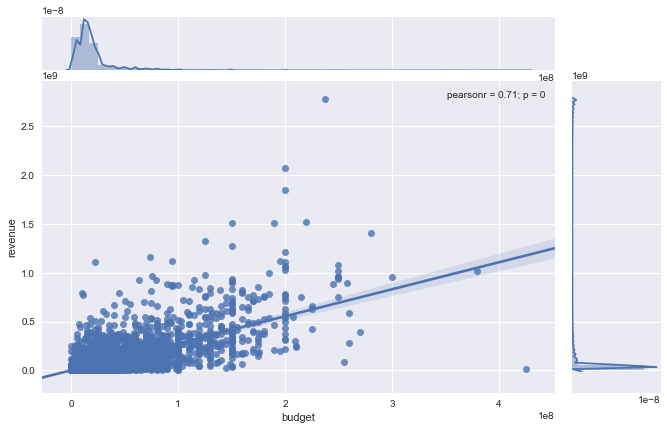

In [207]:
s = sns.jointplot(x = 'budget', y = 'revenue', data = new_movies_df, kind = 'reg')
s.fig.set_figwidth(10)
s.fig.set_figheight(6)
plt.show()

budget and revenue have positive skewed distribution and there is positive correleation


**check the spread of popularity**

C:\Users\dream\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


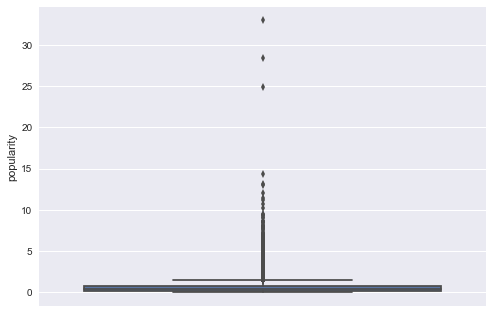

In [208]:
# make a boxplot to see spread of popularity
sns.boxplot(y = new_movies_df['popularity'])
plt.show()

> there are some outliers which have popularity greatr than 25, to  see better spread exclude those point

C:\Users\dream\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


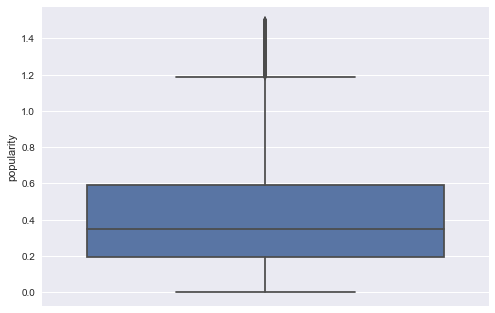

In [209]:
sns.boxplot(y =  'popularity', data = new_movies_df[new_movies_df.popularity < 1.5])
plt.show()

> we can see from the boxplot 75% movies have popularity less than 1.2,  and 50% movies have popularity between 0.2 to 0.6

### Question 3 : number of movies released by genres and which genre get more revenue

** find the unique genres in all dataset **

In [210]:
#find the unique Genres in all dataset
genres_df = new_movies_df['genres'].dropna().str.split('|')

#def find_unique_genres()
unique_genres = []

for genre in genres_df:
    for genre_name in genre:
       
        if genre_name not in unique_genres:
            unique_genres.append(genre_name)
        
unique_genres
    

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [211]:
len(unique_genres)

20

 in all movie dataset we have 20 unique genres

In [212]:
def genre_counts(unique_genres):
    '''
    it will return a dictionary which is having the keys are unique Genres and 
    corresponding value are number of movies and average revenue by Genres
    '''
    my_dict = {}
    for genre in unique_genres:
        my_list = []
        genres_df = new_movies_df[new_movies_df['genres'].str.contains(genre).fillna(False)]
        count = genres_df['genres'].count()
        avg_revenue_by_Genre = genres_df['revenue'].mean()
        my_list.append(count)
        my_list.append(avg_revenue_by_Genre)
        my_dict[genre] = my_list
    return my_dict

movies_by_genres = genre_counts(unique_genres)
movies_by_genres

{'Action': [2384, 91037278.73927307],
 'Adventure': [1471, 129780724.6852126],
 'Animation': [699, 102932482.09619084],
 'Comedy': [3793, 58707473.23833223],
 'Crime': [1354, 58637962.85893421],
 'Documentary': [520, 34519964.28182456],
 'Drama': [4760, 49637907.56568089],
 'Family': [1231, 96646504.17271008],
 'Fantasy': [916, 116116027.88402407],
 'Foreign': [188, 36472524.749081545],
 'History': [334, 51701344.846643254],
 'Horror': [1637, 41772336.14878368],
 'Music': [408, 49145967.4091713],
 'Mystery': [810, 58807783.683903836],
 'Romance': [1712, 54977951.88642307],
 'Science Fiction': [1229, 90388727.30167092],
 'TV Movie': [167, 41114354.33421158],
 'Thriller': [2907, 61769042.739051394],
 'War': [270, 64117157.96069041],
 'Western': [165, 44160081.94787999]}

In [213]:
#convert above dictionary into dataframe
movies_by_genres_df = pd.DataFrame.from_dict(movies_by_genres, orient = 'index')
movies_by_genres_df.columns = ['num_of_movies', 'avg_revenue']
movies_by_genres_df = movies_by_genres_df.sort_values(by = 'num_of_movies')
movies_by_genres_df.head()

,num_of_movies,avg_revenue
Western,165,4.416008e+07
TV Movie,167,4.111435e+07
Foreign,188,3.647252e+07
War,270,6.411716e+07
History,334,5.170134e+07


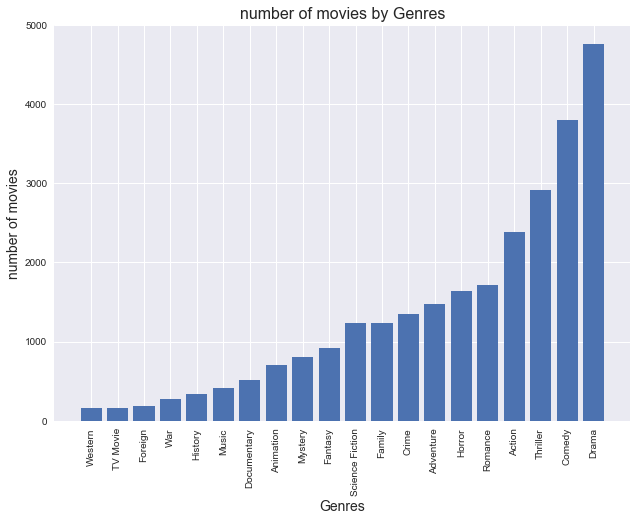

In [214]:
#make a barplot which shows number of movies released  by genre
plt.axes([0,1,1,1])
plt.bar(x = movies_by_genres_df.index, height = movies_by_genres_df['num_of_movies'])
plt.xlabel('Genres', fontsize = 14)
plt.ylabel('number of movies', fontsize = 14)
plt.title('number of movies by Genres', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()


> maximum movies released in Comedy and Drama genres

** which genre got more revenue**

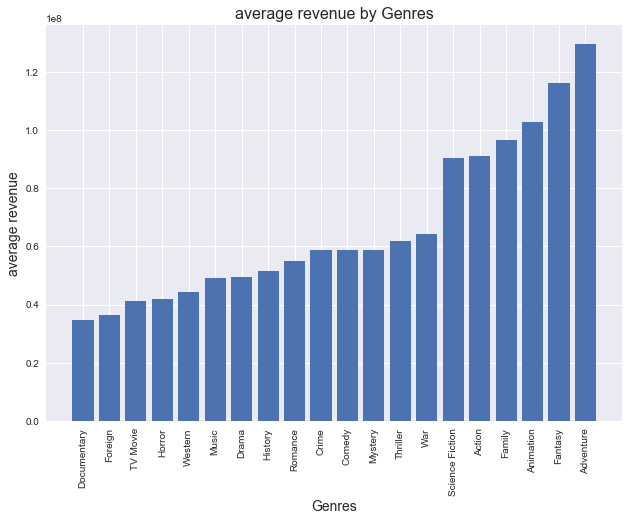

In [215]:
#barplot which shows average revenue by genre
movies_by_genres_df = movies_by_genres_df.sort_values(by = 'avg_revenue')
plt.axes([0,1,1,1])
plt.bar(x = movies_by_genres_df.index, height = movies_by_genres_df['avg_revenue'])
plt.xlabel('Genres', fontsize = 14)
plt.ylabel('average revenue', fontsize = 14)
plt.title('average revenue by Genres', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

> Animation, Fantassy, Adventure type movies has high average revenue

** which year get more revenue **

In [216]:
avg_revenue_by_year = new_movies_df.groupby('release_year', as_index = False).mean()

C:\Users\dream\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


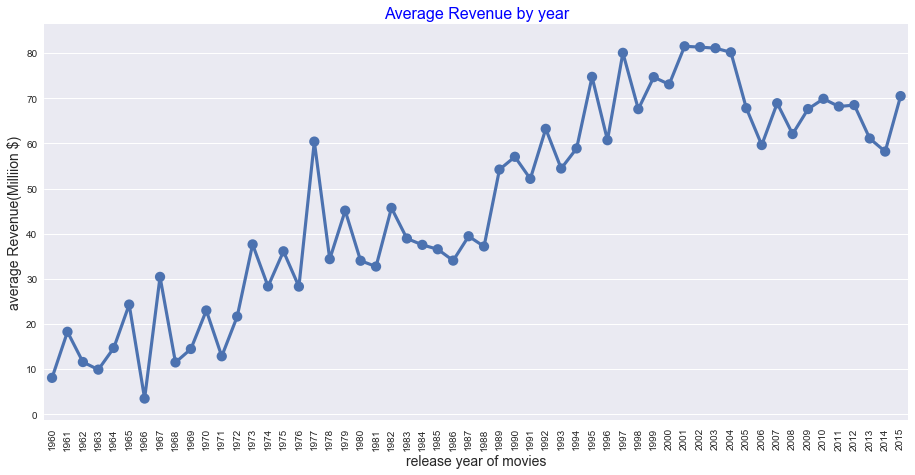

In [217]:
plt.axes([0, 1.5, 1.5, 1])
sns.pointplot(x = 'release_year', y = avg_revenue_by_year['revenue']/1000000, data = avg_revenue_by_year)
plt.xlabel('release year of movies', fontsize = 14)
plt.ylabel('average Revenue(Milliion $)', fontsize = 14)
plt.title('Average Revenue by year', fontsize = 16, color = 'blue')
plt.xticks(rotation = 90)
plt.show()

> highest average revenue got in 2001 to 2004

### Question 4: most popular genre year by year

In [218]:
# find max popularity by gener in each year
max_popularity_by_year = {}
for year in unique_years:
    
    yearly_dataframe = new_movies_df[new_movies_df['release_year'] == year]
    my_dict = {}
    for genre in unique_genres:
        gener_dataframe = yearly_dataframe[yearly_dataframe['genres'].str.contains(genre).fillna(False)]
        avg_popularity_by_genre = gener_dataframe['popularity'].mean()
        my_dict[genre] = avg_popularity_by_genre
        max_popularity_by_year[year] = my_dict

#max_popularity_by_year       
#avg_popular_yearly_movies_by_genres

In [219]:
# convert dictionary into dataframe
max_popular_genre= pd.DataFrame(max_popularity_by_year)

In [220]:
# concatenate two series
yearly_most_popular_genre = pd.concat([max_popular_genre.idxmax(),max_popular_genre.max(axis = 0)], axis = 1)

In [221]:
#give proper column name into dataframe 
yearly_most_popular_genre.columns = ['genre', 'max_popularity']

In [222]:
yearly_most_popular_genre.head()

,genre,max_popularity
1960,Thriller,0.811910
1961,Animation,2.631987
1962,Adventure,0.942513
1963,Animation,2.180410
1964,War,0.930959


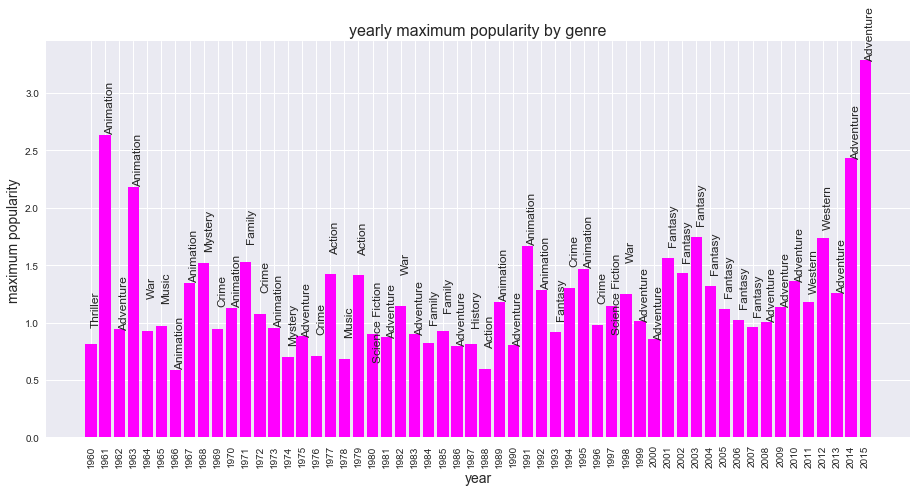

In [223]:
plt.axes([0,1.5,1.5,1])
plt.bar(x= yearly_most_popular_genre.index , height = yearly_most_popular_genre['max_popularity'], color = 'magenta')
for year in yearly_most_popular_genre.index:
    plt.text(x = year, y = yearly_most_popular_genre.loc[year, 'max_popularity']+0.4, s= yearly_most_popular_genre.loc[year, 'genre'], rotation = 90)
plt.xticks(yearly_most_popular_genre.index ,rotation = 90)
plt.xlabel('year', fontsize= 14)
plt.ylabel('maximum popularity', fontsize = 14)
plt.title('yearly maximum popularity by genre', fontsize= 16)
plt.show()

> barplot shows maximum popular gener in every year, we can say that from 2001 to 2007 Fantasy Genre was most popular, and from last 3 year Adventure gener is most popular

<a id='conclusions'></a>
## Conclusions

> after analysis of TMDb movies dataset, initially i found that number of movies released by year and i got that maximum 700 movies released in year 2014. after that i found the relationship between budget and revenue, and positive correlation between them, but correlation does not imply causation. i found that maximum movies released belong to comedy and drama genre but Adventure, Fantasy, Animation movies got more revenue. finally i found most popular genre year by year.

>**limitations** 
<li> In my analysis first i found the number of movies released in year that thing does not affected by null values because it calculated through the number of  years repeated in our dataset.</li>
<li>there are 22 movies there genres are null, and i did not consider these geners, because one movies has more than one genres and number of movies their genres are null its only very less so it does not affect much my analysis, but if these value are also provided then it will be a correct analysis in terms of genres like number or movies by genres, average revenue by genres.
<li> In my dataset there are approx 52% budget and 55% revenue value are zero which is not possible, it can be a human error or any other things. these things highly affected my results, because in movies budget and revenue have more variations if these values are zeros, it affects my results like average revenue by genres, average revenue by year, 
so to minimize this thing i fill these zeros with mean value of budget and revenue of that particular year, in which year budget and revenue has zero value. but it is not a very good way to deal with these zero because there are approx 50 percent values are null and this thing make our result skewed.
If this data was provided than it will be a more accurate analysis in terms of revenue and budget. 